In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [40]:
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Package,Variety,Sub Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Unit of Sale,Repack
0,BALTIMORE,24 inch bins,BIG MACK TYPE,NaN,9/24/16,50.0,60.0,50.0,60.0,MARYLAND,NaN,NaN,WHITE,EACH,N
1,BALTIMORE,24 inch bins,BIG MACK TYPE,NaN,9/24/16,50.0,60.0,50.0,60.0,MARYLAND,NaN,NaN,WHITE,EACH,N
2,BALTIMORE,24 inch bins,BIG MACK TYPE,NaN,9/24/16,50.0,60.0,50.0,60.0,VIRGINIA,NaN,NaN,WHITE,EACH,N
3,BALTIMORE,24 inch bins,BIG MACK TYPE,NaN,10/1/16,50.0,60.0,50.0,60.0,MARYLAND,NaN,NaN,WHITE,EACH,N
4,BALTIMORE,24 inch bins,BIG MACK TYPE,NaN,10/1/16,50.0,60.0,50.0,60.0,MARYLAND,NaN,NaN,WHITE,EACH,N


In [41]:
# show the date column
pumpkins['Date']
#create a new column called date_daily
pumpkins['date_daily'] = pd.to_datetime(pumpkins['Date'])
#show the new column
pumpkins['date_daily']
#transform data from date_daily to 365 days date format
pumpkins['date_daily'] = pumpkins['date_daily'].dt.dayofyear
#show date_daily and the date column
pumpkins[['date_daily', 'Date']]


,date_daily,Date
0,268,9/24/16
1,268,9/24/16
2,268,9/24/16
3,275,10/1/16
4,275,10/1/16
...,...,...
1752,274,9/30/16
1753,270,9/26/16
1754,271,9/27/16
1755,272,9/28/16


In [42]:
#create a new column called average_price
pumpkins['average_price'] = (pumpkins['High Price'] + pumpkins['Low Price']) / 2
pumpkins[['High Price', 'Low Price', 'average_price']]

,High Price,Low Price,average_price
0,60.0,50.0,55.0
1,60.0,50.0,55.0
2,60.0,50.0,55.0
3,60.0,50.0,55.0
4,60.0,50.0,55.0
...,...,...,...
1752,135.0,135.0,135.0
1753,275.0,275.0,275.0
1754,275.0,275.0,275.0
1755,275.0,275.0,275.0


Supprimer les lignes

In [43]:
pumpkins = pumpkins[pumpkins['Package'] != '20 lb cartons']
pumpkins = pumpkins[pumpkins['Package'] != '35 lb cartons']
pumpkins = pumpkins[pumpkins['Package'] != 'bushel cartons']
pumpkins = pumpkins[pumpkins['Package'] != '40 lb cartons']
pumpkins = pumpkins[pumpkins['Package'] != '1 1/9 bushel crates']
pumpkins = pumpkins[pumpkins['Package'] != 'each']
pumpkins = pumpkins[pumpkins['Package'] != 'bins']
pumpkins = pumpkins[pumpkins['Package'] != '50 lb sacks']
pumpkins = pumpkins[pumpkins['Package'] != 'bushel baskets']
pumpkins = pumpkins[pumpkins['Package'] != '22 lb cartons']
pumpkins = pumpkins[pumpkins['Package'] != '50 lb cartons']
pumpkins = pumpkins[pumpkins['Package'] != '20 lb cartons']
# count the number of diferent unique values in the Package column
pumpkins['Package'].value_counts()

36 inch bins            663
24 inch bins            551
1/2 bushel cartons      234
1 1/9 bushel cartons    117
Name: Package, dtype: int64

In [46]:
X = pumpkins['date_daily'].to_numpy().reshape(-1,1)
y = pumpkins['average_price']


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
lin_reg = LinearRegression().fit(X_train,y_train)


LinearRegression()

In [51]:
pred = lin_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {rmse:3.3} ({rmse/np.mean(pred)*100:3.3}%)')

Mean error: 82.4 (59.7%)


In [52]:
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.023073053571182056


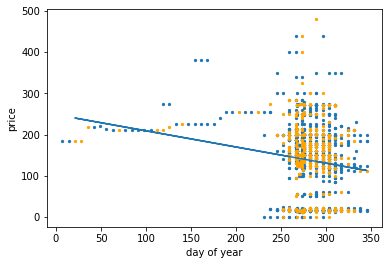

In [56]:
plt.scatter(X_train,y_train, s = 5) #Training data
plt.scatter(X_test,y_test, color = "orange", s = 5) #Test data
plt.plot(X_test, pred) #Regression line
plt.xlabel("day of year")
plt.ylabel("price")
plt.show()